In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('AWCustomers.csv')

In [3]:
df=pd.DataFrame(data)

In [4]:
df.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000
mean,20241.987092,0.610588,1.270301,0.338162,0.850389,72754.779642
std,5336.332731,0.487630,0.913989,0.568957,0.927315,30686.014313
min,11000.000000,0.000000,0.000000,0.000000,0.000000,25435.000000
25%,15621.000000,0.000000,1.000000,0.000000,0.000000,53312.000000
50%,20248.000000,1.000000,1.000000,0.000000,0.000000,61851.000000
75%,24863.000000,1.000000,2.000000,1.000000,2.000000,87410.000000
max,29483.000000,1.000000,5.000000,3.000000,3.000000,139115.000000


In [5]:
df.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated
0,21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,...,Bachelors,Clerical,M,M,1,3,0,1,81916,06-03-2017
1,13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,...,Partial College,Clerical,M,M,1,2,1,2,81076,06-03-2017
2,29350,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,West Covina,California,...,Bachelors,Clerical,F,S,0,3,0,0,86387,06-03-2017
3,13503,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,Liverpool,England,...,Partial College,Skilled Manual,M,M,1,2,1,2,61481,06-03-2017
4,22803,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,Werne,Nordrhein-Westfalen,...,Partial College,Skilled Manual,M,S,1,1,0,0,51804,06-03-2017


In [6]:
new_df=df.drop(['CustomerID','Title','FirstName','MiddleName','LastName','Suffix','AddressLine1',"AddressLine2",'City','StateProvinceName','CountryRegionName','PhoneNumber','Education','LastUpdated'],axis=1)

In [7]:
new_df.head()

,PostalCode,BirthDate,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,2500,13-11-1987,Clerical,M,M,1,3,0,1,81916
1,V9B 2C3,21-07-1972,Clerical,M,M,1,2,1,2,81076
2,91791,09-11-1985,Clerical,F,S,0,3,0,0,86387
3,L4 4HB,18-10-1977,Skilled Manual,M,M,1,2,1,2,61481
4,59368,05-02-1975,Skilled Manual,M,S,1,1,0,0,51804


In [8]:
import matplotlib as plt
import seaborn as sns

In [9]:
dict={
    'Nominal' : ['PostalCode','Occupation','Gender','Marital Status','BirthDate','HomeOwnerFlag'],
    'Discrete': ['NumberCarsOwned','NumberChildrenAtHome','TotalChildren'],
    'Continuous': ['YearlyIncome']
}

In [10]:
sales_data=pd.read_csv('AWSales.csv')

In [11]:
s_df=pd.DataFrame(sales_data)

In [12]:
s_df.head()

,CustomerID,BikeBuyer,AvgMonthSpend
0,21173,1,50.97
1,13249,1,53.11
2,29350,1,54.08
3,13503,1,56.93
4,22803,1,55.41


In [13]:
s_df.columns.values

array(['CustomerID', 'BikeBuyer', 'AvgMonthSpend'], dtype=object)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

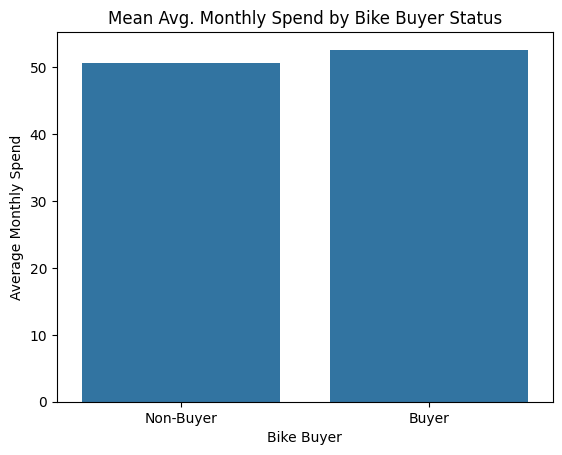

In [15]:
means = s_df.groupby('BikeBuyer')['AvgMonthSpend'].mean().reset_index()
sns.barplot(x='BikeBuyer', y='AvgMonthSpend', data=means)
plt.xticks([0, 1], ['Non-Buyer', 'Buyer'])
plt.title('Mean Avg. Monthly Spend by Bike Buyer Status')
plt.xlabel('Bike Buyer')
plt.ylabel('Average Monthly Spend')
plt.show()

In [16]:
merged_df = pd.merge(df, s_df, on='CustomerID')

In [17]:
merged_df.columns.values

array(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName',
       'Suffix', 'AddressLine1', 'AddressLine2', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode',
       'PhoneNumber', 'BirthDate', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome',
       'LastUpdated', 'BikeBuyer', 'AvgMonthSpend'], dtype=object)

In [19]:
merged_df['BirthDate'] = pd.to_datetime(merged_df['BirthDate'])
merged_df['Age'] = (pd.Timestamp('today') - merged_df['BirthDate']).dt.days // 365

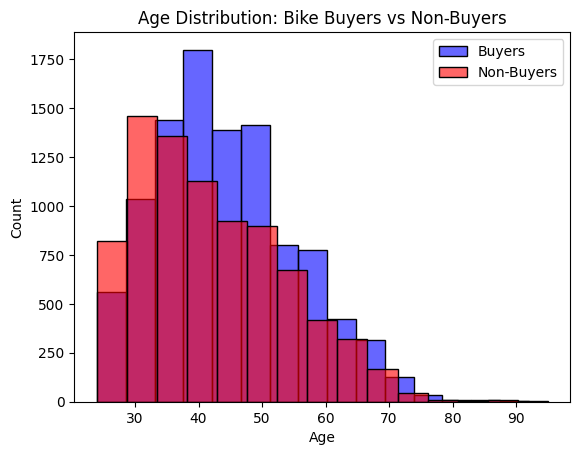

In [20]:
sns.histplot(merged_df[merged_df['BikeBuyer'] == 1]['Age'].dropna(), color='blue', label='Buyers', kde=False, bins=15, alpha=0.6)
sns.histplot(merged_df[merged_df['BikeBuyer'] == 0]['Age'].dropna(), color='red', label='Non-Buyers', kde=False, bins=15, alpha=0.6)

plt.legend()
plt.title('Age Distribution: Bike Buyers vs Non-Buyers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Proportion of Bike Buyers by Marital Status:
BikeBuyer              0          1
MaritalStatus                      
M              36.161657  63.838343
S              55.062990  44.937010


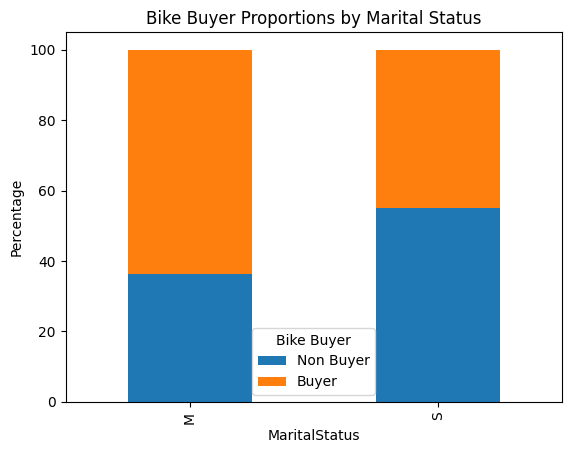

In [21]:
marital_table = pd.crosstab(merged_df['MaritalStatus'], merged_df['BikeBuyer'], normalize='index') * 100
print("Proportion of Bike Buyers by Marital Status:")
print(marital_table)

marital_table.plot(kind='bar', stacked=True)
plt.ylabel('Percentage')
plt.title('Bike Buyer Proportions by Marital Status')
plt.legend(title='Bike Buyer', labels=['Non Buyer', 'Buyer'])
plt.show()

Percentage of Bike Buyers by StateProvinceName:
StateProvinceName
Alabama                100.000000
Alberta                 54.545455
Arizona                 50.000000
Bayern                  48.898678
Brandenburg             65.517241
British Columbia        55.246114
California              56.643991
Charente-Maritime       61.904762
England                 54.044118
Essonne                 58.904110
Florida                  0.000000
Garonne (Haute)         43.333333
Georgia                 66.666667
Hamburg                 53.378378
Hauts de Seine          53.886010
Hessen                  53.191489
Illinois                66.666667
Kentucky               100.000000
Loir et Cher            52.941176
Loiret                  51.724138
Maryland                 0.000000
Massachusetts          100.000000
Minnesota              100.000000
Mississippi              0.000000
Missouri                 0.000000
Montana                100.000000
Moselle                 48.214286
New South Wales 

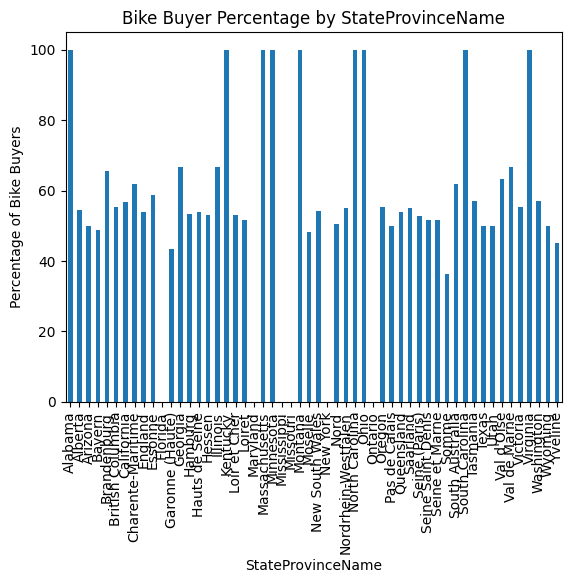

In [22]:
commute_purchase = merged_df.groupby('StateProvinceName')['BikeBuyer'].mean() * 100
print("Percentage of Bike Buyers by StateProvinceName:")
print(commute_purchase)

commute_purchase.plot(kind='bar')
plt.ylabel('Percentage of Bike Buyers')
plt.title('Bike Buyer Percentage by StateProvinceName')
plt.show()